In [1]:
import pandas as pd
import numpy as np

In [2]:
from kNN import kNN
from imputation import imputed_sqr_err, run

In [3]:
k = 10
seed = 42

In [4]:
random_generator = np.random.default_rng(seed)

In [5]:
df = pd.read_csv("./data/thyroidDF.csv")
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [6]:
df = df[(df["age"] >= 0) & (df["age"] < 100)]
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [7]:
qual_cols = { "age",  "TSH", "T3", "TT4", "T4U", "FTI", "TBG" }
cat_cols = { "sex", "on_thyroxine", "on_antithyroid_meds", "sick", "pregnant", "thyroid_surgery", "I131_treatment", "lithium", "goitre", "tumor", "psych", "referral_source", "target" }
remove_qual_cols = { "TBG" }
remove_cat_cols = { "referral_source", "target" }
sel_qual_cols = list(qual_cols.difference(remove_qual_cols))
sel_cat_cols = list(cat_cols.difference(remove_cat_cols))
only_sel_qual_cols = sel_qual_cols.copy()
sel_qual_cols.extend(sel_cat_cols)

In [8]:
qual_na_df = df[sel_qual_cols].dropna()
#qual_na_df = qual_na_df.sample(n=200, replace=False, random_state=np.random.RandomState(seed))

In [9]:
categorical_dict = {
    "f" : 0,
    "t" : 1,
    "F" : 0,
    "M" : 1
}

def replace_col(series, col):
    series[col] = categorical_dict[series[col]]
    return series

for col in sel_cat_cols:
    qual_na_df = qual_na_df.apply(lambda s : replace_col(s, col), axis=1)

col_scaler = dict()

for col in only_sel_qual_cols:
    col_max = qual_na_df[col].max()
    col_min = qual_na_df[col].min()
    col_range = col_max - col_min
    col_scaler[col] = (col_max, col_min, col_range)
    qual_na_df[col] = (qual_na_df[col] - col_min) / col_range

In [10]:
from utils.data_split import k_fold_split

In [11]:
complete_vals_df, remove_vals_df = k_fold_split(qual_na_df, k, random_generator)
missing_vals_idxs = list(remove_vals_df.index)

real_df = pd.concat([complete_vals_df, remove_vals_df])

In [12]:
from utils.forgetter import forget_random_col_per_sample_2

In [13]:
weight_map = {
    "age" : 1,
    "T3"  : 1,
    "T4U" : 1,
    "TSH" : 1,
    "TT4" : 1,
    "FTI" : 1
}

In [14]:
missing_vals_df, missing_col_map, missing_vals_idxs, picked_columns = forget_random_col_per_sample_2(remove_vals_df, weight_map, random_generator)

real_df = pd.concat([complete_vals_df, remove_vals_df])
curr_df = pd.concat([complete_vals_df, missing_vals_df])

In [15]:
predictions = {
    7 : (1, 12),
    8 : (3, 14),
    10 : (2, 11)
}

In [16]:
predictions_weights = {k: v[0] for k, v in predictions.items()}
predictions_weights

{7: 1, 8: 3, 10: 2}

In [17]:
attr_types = {
    "age" : "qualitative",
    "T3"  : "qualitative",
    "T4U" : "qualitative",
    "TSH" : "qualitative",
    "TT4" : "qualitative",
    "FTI" : "qualitative",
    'on_antithyroid_meds': "categorical",
    'on_thyroxine': "categorical",
    'thyroid_surgery': "categorical",
    'sick': "categorical",
    'tumor': "categorical",
    'goitre': "categorical",
    'pregnant': "categorical",
    'I131_treatment': "categorical",
    'lithium': "categorical",
    'sex': "categorical",
    'psych': "categorical"
}

In [18]:
def kNN_impl_wrapper(complete_vals_df, missing_vals_df, missing_col_map, attr_types, k, is_weighted, sel_qual_cols, remove_vals_df, col_scaler):
    remove_vals_df = remove_vals_df.copy()
    knn_impl_imputed_df = kNN(complete_vals_df, missing_vals_df, missing_col_map, attr_types, k, is_weighted)
    knn_impl_imputed_df["imputed"] = ""
    for idx in knn_impl_imputed_df.index:
        knn_impl_imputed_df.loc[idx, "imputed"] = knn_impl_imputed_df.loc[idx, knn_impl_imputed_df.loc[idx].isna()].index[0]
        knn_impl_imputed_df.loc[idx, knn_impl_imputed_df.loc[idx].isna()] = knn_impl_imputed_df.loc[idx, "predictions"]
    knn_impl_imputed_df.drop(["predictions"], axis=1, inplace=True)
    for col in sel_qual_cols:
        col_max, col_min, col_range = col_scaler[col]
        knn_impl_imputed_df[col] = knn_impl_imputed_df[col]*col_range + col_min
        remove_vals_df[col] = remove_vals_df[col]*col_range + col_min
    for col in sel_qual_cols:
        knn_impl_imputed_df[col + " (imputed)"] = knn_impl_imputed_df[col]
        knn_impl_imputed_df[col + " (real)"] = remove_vals_df[col]
        knn_impl_imputed_df.drop([col], axis=1, inplace=True)
    return knn_impl_imputed_df

In [19]:
knn_impl_imputed_df = kNN_impl_wrapper(complete_vals_df, missing_vals_df, missing_col_map, attr_types, k, False, only_sel_qual_cols, remove_vals_df, col_scaler)
knn_impl_imputed_df

,thyroid_surgery,pregnant,sick,I131_treatment,lithium,on_thyroxine,tumor,on_antithyroid_meds,psych,goitre,...,TT4 (imputed),TT4 (real),age (imputed),age (real),TSH (imputed),TSH (real),T3 (imputed),T3 (real),FTI (imputed),FTI (real)
2264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,71.0,71.0,62.0,62.0,0.1000,0.10,0.7,0.7,100.3,96.0
6844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,87.0,91.0,58.0,58.0,2.7000,2.70,2.3,2.3,92.0,92.0
5356,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,117.0,107.0,70.0,70.0,2.3000,2.30,1.2,1.2,105.0,105.0
2182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,108.0,108.0,31.0,31.0,0.3000,0.30,2.7,2.7,103.0,103.0
6191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,106.0,96.0,13.0,13.0,2.5000,2.50,1.7,1.7,142.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89.0,89.0,86.0,86.0,0.2500,0.25,1.8,1.8,100.0,100.0
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,72.0,65.0,65.0,4.3900,4.70,1.6,1.6,85.0,85.0
5368,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,118.0,118.0,65.0,65.0,3.2255,12.00,1.2,1.2,130.0,130.0
1031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,269.0,269.0,39.1,18.0,0.2500,0.25,2.5,2.5,165.0,165.0


In [20]:
wknn_impl_imputed_df = kNN_impl_wrapper(complete_vals_df, missing_vals_df, missing_col_map, attr_types, k, True, only_sel_qual_cols, remove_vals_df, col_scaler)
wknn_impl_imputed_df

,thyroid_surgery,pregnant,sick,I131_treatment,lithium,on_thyroxine,tumor,on_antithyroid_meds,psych,goitre,...,TT4 (imputed),TT4 (real),age (imputed),age (real),TSH (imputed),TSH (real),T3 (imputed),T3 (real),FTI (imputed),FTI (real)
2264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,71.000000,71.0,62.000000,62.0,0.100000,0.10,0.7,0.7,98.098988,96.0
6844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,89.812822,91.0,58.000000,58.0,2.700000,2.70,2.3,2.3,92.000000,92.0
5356,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,112.591329,107.0,70.000000,70.0,2.300000,2.30,1.2,1.2,105.000000,105.0
2182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,108.000000,108.0,31.000000,31.0,0.300000,0.30,2.7,2.7,103.000000,103.0
6191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,107.965384,96.0,13.000000,13.0,2.500000,2.50,1.7,1.7,142.000000,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89.000000,89.0,86.000000,86.0,0.250000,0.25,1.8,1.8,100.000000,100.0
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.000000,72.0,65.000000,65.0,3.454127,4.70,1.6,1.6,85.000000,85.0
5368,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,118.000000,118.0,65.000000,65.0,3.683452,12.00,1.2,1.2,130.000000,130.0
1031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,269.000000,269.0,37.259387,18.0,0.250000,0.25,2.5,2.5,165.000000,165.0


In [21]:
knn_impl_sqr_err_dict = imputed_sqr_err(real_df.columns, knn_impl_imputed_df)
knn_impl_sqr_err_dict

{'T4U': 0.01401742901960783,
 'TT4': 144.78692490721653,
 'age': 290.8756363636362,
 'TSH': 285.6900213239112,
 'T3': 0.19031802325581393,
 'FTI': 92.47658045977012,
 'thyroid_surgery': 0,
 'pregnant': 0,
 'sick': 0,
 'I131_treatment': 0,
 'lithium': 0,
 'on_thyroxine': 0,
 'tumor': 0,
 'on_antithyroid_meds': 0,
 'psych': 0,
 'goitre': 0,
 'sex': 0}

In [22]:
wknn_impl_sqr_err_dict = imputed_sqr_err(real_df.columns, wknn_impl_imputed_df)
wknn_impl_sqr_err_dict

{'T4U': 0.013890328197001622,
 'TT4': 96.70260239458331,
 'age': 328.2622551542955,
 'TSH': 306.33733249984107,
 'T3': 0.27239428668862564,
 'FTI': 76.33162926401131,
 'thyroid_surgery': 0,
 'pregnant': 0,
 'sick': 0,
 'I131_treatment': 0,
 'lithium': 0,
 'on_thyroxine': 0,
 'tumor': 0,
 'on_antithyroid_meds': 0,
 'psych': 0,
 'goitre': 0,
 'sex': 0}

In [23]:
knn_imputed_df, _ = run(real_df, curr_df, missing_vals_idxs, picked_columns, "kNN",
                         config={
                             "n_neighbors": k
                         }, estimator_config={})
for col in only_sel_qual_cols:
        col_max, col_min, col_range = col_scaler[col]
        knn_imputed_df[col + " (real)"] = knn_imputed_df[col + " (real)"]*col_range + col_min
        knn_imputed_df[col + " (imputed)"] = knn_imputed_df[col + " (imputed)"]*col_range + col_min
knn_sqr_err_dict = imputed_sqr_err(real_df.columns, knn_imputed_df)
knn_sqr_err_dict

{'T4U': 0.014017429019607836,
 'TT4': 144.78692490721647,
 'age': 290.8756363636362,
 'TSH': 285.6900213239112,
 'T3': 0.19031802325581393,
 'FTI': 92.4765804597701,
 'thyroid_surgery': 0,
 'pregnant': 0,
 'sick': 0,
 'I131_treatment': 0,
 'lithium': 0,
 'on_thyroxine': 0,
 'tumor': 0,
 'on_antithyroid_meds': 0,
 'psych': 0,
 'goitre': 0,
 'sex': 0}

In [24]:
wknn_imputed_df, _ = run(real_df, curr_df, missing_vals_idxs, picked_columns, "WkNN",
                         config={
                             "n_neighbors": k
                         }, estimator_config={})
for col in only_sel_qual_cols:
        col_max, col_min, col_range = col_scaler[col]
        wknn_imputed_df[col + " (real)"] = wknn_imputed_df[col + " (real)"]*col_range + col_min
        wknn_imputed_df[col + " (imputed)"] = wknn_imputed_df[col + " (imputed)"]*col_range + col_min
wknn_sqr_err_dict = imputed_sqr_err(real_df.columns, wknn_imputed_df)
wknn_sqr_err_dict

{'T4U': 0.013556719612555966,
 'TT4': 118.82934446574099,
 'age': 301.37187205789775,
 'TSH': 291.9253830479631,
 'T3': 0.22225750474617084,
 'FTI': 83.50081923137093,
 'thyroid_surgery': 0,
 'pregnant': 0,
 'sick': 0,
 'I131_treatment': 0,
 'lithium': 0,
 'on_thyroxine': 0,
 'tumor': 0,
 'on_antithyroid_meds': 0,
 'psych': 0,
 'goitre': 0,
 'sex': 0}

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

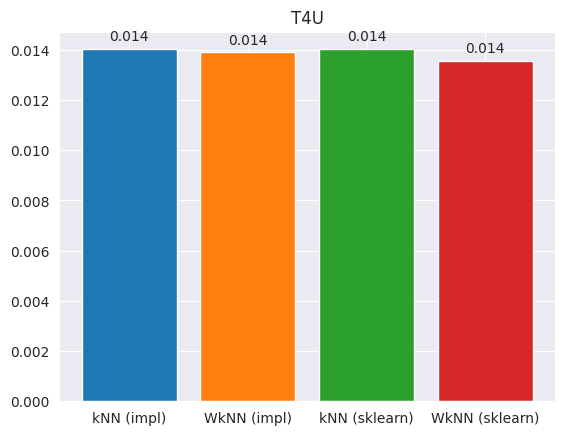

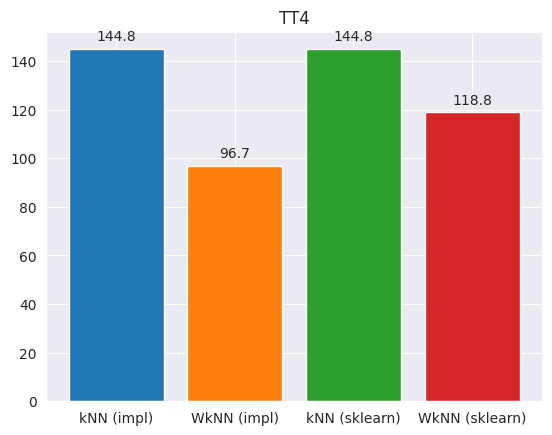

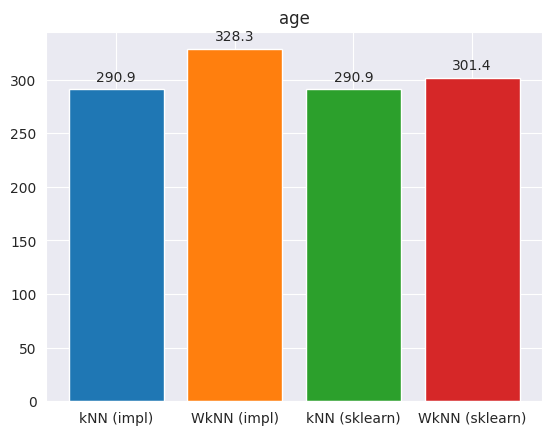

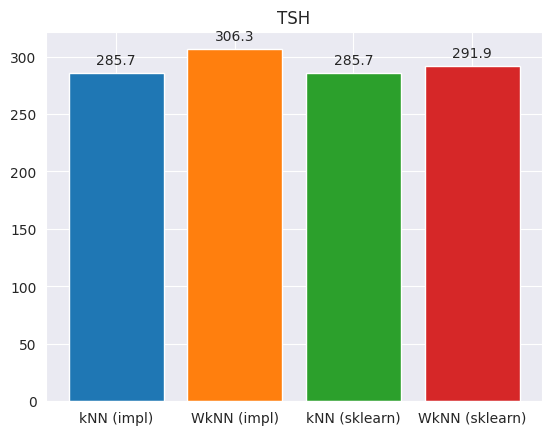

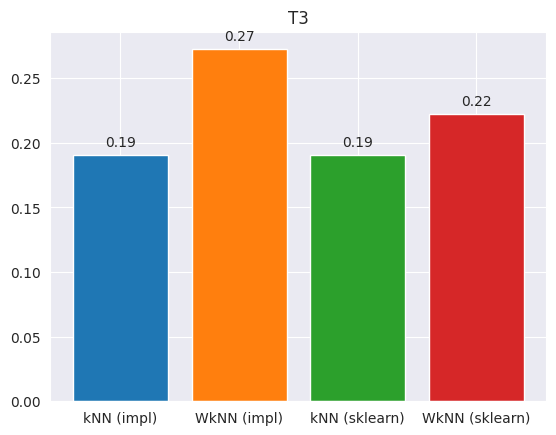

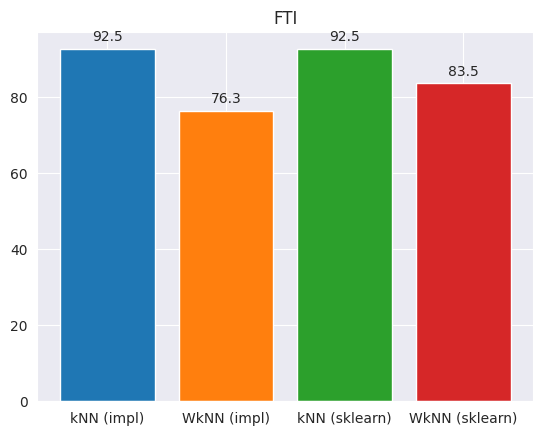

In [26]:
for col in only_sel_qual_cols:
    plot = list()
    val = list()
    plot.append(plt.bar(["kNN (impl)"], knn_impl_sqr_err_dict[col]))
    val.append(knn_impl_sqr_err_dict[col])
    plot.append(plt.bar(["WkNN (impl)"], wknn_impl_sqr_err_dict[col]))
    val.append(wknn_impl_sqr_err_dict[col])
    plot.append(plt.bar(["kNN (sklearn)"], knn_sqr_err_dict[col]))
    val.append(knn_sqr_err_dict[col])
    plot.append(plt.bar(["WkNN (sklearn)"], wknn_sqr_err_dict[col]))
    val.append(wknn_sqr_err_dict[col])
    for i in range(len(plot)):
        splot = plot[i]
        for p in splot.patches:
            plt.annotate(format(p.get_height(), '.2g' if val[i] < 1 else '.1f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')
    plt.title(col)
    plt.show()